<h1 style="text-align: center;">Carl Benedict L. Elipan</h1>
<h2 style="text-align: center;">Naive Bayes Spam Filter</h2>


Link to the github repository: <</https://github.com/HENERALPEPITO/CMSC-197.git>>



**Add Necessary Libraries**

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import random
import email
from email import message
import string
import re
import codecs
from email import policy

sns.set_style("whitegrid")
sns.set_context("poster")



Preprocessing (10 points)
Split the dataset into three(3) groups: training set for ham, training set for spam, and the testing set.

Folders 0-70: Train Set

Folders 71-126: Test set

Train sets included 21, 300 emails and 16, 522 emails for the test set.  The labels contained 
in the label file was attached to its corresponding email.  

In [9]:
# Get path of main directory
abs_path = os.path.abspath('MP3-Naive Bayes Spam Filter\\trec06p-cs280\\trec06p-cs280')

# Lead to data folder
rel_path = "data"
path = os.path.join(abs_path, rel_path)

# Get list of folders
folders = [i[0] for i in os.walk(path)]

# Folders for training and testing
training_folders = folders[1:72]
testing_folders = folders[72:]


Read and open labels and Stopwords

In [10]:
with open("MP3-Naive Bayes Spam Filter\\trec06p-cs280\\trec06p-cs280\\labels") as labels_file:
    labels = labels_file.read().splitlines()

with open("MP3-Naive Bayes Spam Filter\\stop_words.txt") as stop_file:
    stopwords = stop_file.read().splitlines()


Remove words from the document which may not contribute to the information we want to extract. These includes dropping the alphanumeric characters and punctuation marks.

Remove stop words, more popularly known as meaningless words, from the email body since those words are not useful in classification as well as reduce the dimensionality of the dictionary. A text file with filename, stop_words.txt, is also uploaded in LMS.

In [11]:
# Function to get the email body
def get_email_body(file):
    msg = email.message_from_file(file, policy=policy.default)
    body = ''
    
    # If the email is multipart, iterate through the parts to get the main body
    if msg.is_multipart():
        for part in msg.walk():
            if part.get_content_type() == 'text/plain':
                body = part.get_payload(decode=True).decode('utf-8', errors='replace')
                break
    else:
        # Single-part email, extract the body directly
        body = msg.get_payload(decode=True).decode('utf-8', errors='replace')

    return body




In [12]:
# Compile the pattern to remove HTML tags
tags = re.compile('<.*?>')

# Function to clean email data (remove HTML tags, special characters, etc.)
def clean_data(body):
    # Remove HTML tags
    body_cleaned = re.sub(tags, ' ', body)
    # Remove non-printable characters
    body_cleaned = re.sub(r'[^\x20-\x7E]+', ' ', body_cleaned)  # Only printable ASCII characters
    # Replace non-word characters with a space
    body_cleaned = re.sub(r'\W+', ' ', body_cleaned)
    # Remove single characters and digits
    body_cleaned = re.sub(r' \b\w{1}\b|[0-9]', '', body_cleaned)
    # Remove remaining digits
    body_cleaned = re.sub(r'\d+', '', body_cleaned)

    # Convert to lowercase and split into words
    words = body_cleaned.strip().lower().split()

    return words

In [13]:
# Function to remove stopwords from a list of words
def remove_stop_words(word_list):
    return [word for word in word_list if word not in stopwords]

In [14]:
# Function to count word occurrences
def count_occurrences(word_list):
    word_df = pd.Series(word_list).value_counts().rename_axis('Word').reset_index(name='Count')
    return word_df

**Preprocessing Loop**


In [ ]:
# Initialize empty DataFrame for word counts and cleaned bodies
count_df = pd.DataFrame(columns=['Word', 'Count'])
cleaned_bodies = []

# Process each email in the training folders
for folder in training_folders:
    email_files = os.listdir(folder)
    print(folder)  # Track the folder being processed
    
    for email_file in email_files:
        # Path of the current email file
        file_path = os.path.join(folder, email_file)
        
        with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
            # Get and clean email body
            body = get_email_body(f)
            word_list = clean_data(body)
            
            # Remove stopwords from the cleaned word list
            filtered_word_list = remove_stop_words(word_list)
            
            # Create a cleaned email body as a single string
            cleaned_body = " ".join(filtered_word_list)
            
            # Append the cleaned body to the list
            cleaned_bodies.append({'File': email_file, 'Cleaned_Body': cleaned_body})
            
            # Count occurrences and append to count_df
            word_df = count_occurrences(filtered_word_list)
            count_df = pd.concat([count_df, word_df], ignore_index=True)

# Convert the cleaned bodies list to a DataFrame
email_bodies_df = pd.DataFrame(cleaned_bodies)

# Group and sum word counts
count_df = count_df.groupby('Word', as_index=False).agg({'Count': 'sum'})

# Display the DataFrame with cleaned email bodies
print(email_bodies_df)

c:\Users\carli\Documents\College\4TH YEAR FIRST SEM FILES\CMSC 197\hw4\MP3-Naive Bayes Spam Filter\trec06p-cs280\trec06p-cs280\data\000
c:\Users\carli\Documents\College\4TH YEAR FIRST SEM FILES\CMSC 197\hw4\MP3-Naive Bayes Spam Filter\trec06p-cs280\trec06p-cs280\data\001
c:\Users\carli\Documents\College\4TH YEAR FIRST SEM FILES\CMSC 197\hw4\MP3-Naive Bayes Spam Filter\trec06p-cs280\trec06p-cs280\data\002
c:\Users\carli\Documents\College\4TH YEAR FIRST SEM FILES\CMSC 197\hw4\MP3-Naive Bayes Spam Filter\trec06p-cs280\trec06p-cs280\data\003
c:\Users\carli\Documents\College\4TH YEAR FIRST SEM FILES\CMSC 197\hw4\MP3-Naive Bayes Spam Filter\trec06p-cs280\trec06p-cs280\data\004
c:\Users\carli\Documents\College\4TH YEAR FIRST SEM FILES\CMSC 197\hw4\MP3-Naive Bayes Spam Filter\trec06p-cs280\trec06p-cs280\data\005
c:\Users\carli\Documents\College\4TH YEAR FIRST SEM FILES\CMSC 197\hw4\MP3-Naive Bayes Spam Filter\trec06p-cs280\trec06p-cs280\data\006
c:\Users\carli\Documents\College\4TH YEAR FIRST 

In [48]:
# sorting combined emails
sorted_count = count_df.sort_values(by="Count", ascending=False)
sorted_count

,Word,Count
81921,ufffd,1529585
42505,http,17659
81541,ub,17607
89114,will,11500
81439,ua,9286
...,...,...
12069,ariewgkybmicsqryaqae,1
55464,modulator,1
12068,aries,1
55467,modulo,1


Extract 10000 most common words (common means that these words have the highest frequencies/occurences in the dataset). 

In [49]:
top_10000_words_df = sorted_count[['Word', 'Count']][:10000].reset_index(drop=True)
top_10000_words_df

,Word,Count
0,ufffd,1529585
1,http,17659
2,ub,17607
3,will,11500
4,ua,9286
...,...,...
9995,inscrire,20
9996,awahaaaa,20
9997,ceg,20
9998,mailout,20


In [50]:
top_10000_words = list(top_10000_words_df.Word)



Creating the feature matrices (5 points) 

In [51]:
# Initialize values for counting ham and spam
spam_values = []
ham_values = []
total_spam = 0
total_ham = 0
folder_count = 0

# Iterate through training folders
for folder in training_folders:
    email_files = os.listdir(folder)

    # Iterate through emails in the folder
    for i, email_file in enumerate(email_files):
        file_path = os.path.join(folder, email_file)
        
        # Open the file and extract email body
        with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
            body = get_email_body(f)
        
        # Process the email content
        word_list = clean_data(body)
        word_list = remove_stop_words(word_list)

        # Determine if the email is spam or ham
        if "spam" in labels[i + (folder_count * 300)]:
            total_spam += 1
            category = spam_values
        else:
            total_ham += 1
            category = ham_values

        # Create the binary email values for top 10000 words
        email_values = [1 if word in word_list else 0 for word in top_10000_words]

        # Filter out words not in top 10000 from word_list
        word_list = [word for word in word_list if word in top_10000_words]
        
        # Add the current email values to the respective category
        category.append(email_values)
    
    # Increment folder count
    folder_count += 1


In [52]:
spam_feature_matrix = pd.DataFrame(spam_values, columns=top_10000_words)
spam_feature_matrix

,ufffd,http,ub,will,ua,uf,ufffde,ufffdb,nbsp,ue,...,inquisitive,edges,exhibition,inria,snap,inscrire,awahaaaa,ceg,mailout,saudi
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13772,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13773,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13774,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
13775,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
ham_feature_matrix = pd.DataFrame(ham_values, columns=top_10000_words)
ham_feature_matrix

,ufffd,http,ub,will,ua,uf,ufffde,ufffdb,nbsp,ue,...,inquisitive,edges,exhibition,inria,snap,inscrire,awahaaaa,ceg,mailout,saudi
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7518,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7519,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7520,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7521,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Computing the Priors (5 points) 


In [54]:
# get total number of emails
total_emails = len(spam_feature_matrix) + len(ham_feature_matrix) 
total_emails

21300

In [55]:
# probability that an email is spam
prob_spam = total_spam / total_emails
prob_spam

0.6468075117370892

In [56]:
# probability that an email is ham
prob_ham = total_ham / total_emails
prob_ham

0.3531924882629108

**Computing likelihood of each word w/ laplace smoothing**
* create separate vectors that sums up the occurrences of each word in spam and ham categories
* compute probability of each word being either a spm or ham word and store in dataframe

In [57]:
# sum up occurrences of each word in spam emails
spam_vector = spam_feature_matrix.sum()
spam_vector

ufffd       1474
http        6558
ub           652
will        2244
ua           749
            ... 
inscrire      10
awahaaaa       0
ceg           20
mailout        0
saudi          4
Length: 10000, dtype: int64

In [58]:
# sum up occurrences of each word in ham emails
ham_vector = ham_feature_matrix.sum()
ham_vector

ufffd         33
http        1941
ub             3
will        2311
ua            29
            ... 
inscrire       0
awahaaaa       1
ceg            0
mailout        1
saudi          0
Length: 10000, dtype: int64

In [59]:
# make dataframes that will hold p(c|w) values
prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])

In [60]:
# insert the top 10000 words as rows in each df of each category
prob_spam_words.Word = spam_feature_matrix.columns
prob_ham_words.Word = ham_feature_matrix.columns

In [61]:
# total count of occurrences of all words in each category
spam_word_total = spam_feature_matrix.values.sum()
ham_word_total = ham_feature_matrix.values.sum()

In [62]:
spam_word_total

517106

In [63]:
ham_word_total

390330

In [64]:
lambda_value = 1

In [65]:
# Calculate probabilities for spam words --> P(w|S)
probabilities = []
for i in range(len(spam_vector)):
    probability = (spam_vector.iloc[i] + lambda_value) / (spam_word_total + lambda_value * len(spam_vector))
    probabilities.append(probability)


In [66]:
prob_spam_words.Probability = probabilities
prob_spam_words

,Word,Probability
0,ufffd,0.002798
1,http,0.012443
2,ub,0.001239
3,will,0.004259
4,ua,0.001423
...,...,...
9995,inscrire,0.000021
9996,awahaaaa,0.000002
9997,ceg,0.000040
9998,mailout,0.000002


In [67]:
# Calculate probabilities for ham words --> P(w|H)
probabilities = []
for i in range(len(ham_vector)):
    probability = (ham_vector.iloc[i] + lambda_value) / (ham_word_total + lambda_value * len(ham_vector))
    probabilities.append(probability)


In [68]:
# place probabilities in dataframe
prob_ham_words.Probability = probabilities
prob_ham_words

,Word,Probability
0,ufffd,0.000085
1,http,0.004851
2,ub,0.000010
3,will,0.005775
4,ua,0.000075
...,...,...
9995,inscrire,0.000002
9996,awahaaaa,0.000005
9997,ceg,0.000002
9998,mailout,0.000005


In [69]:
# check ham and spam count if correct
scount = 0
hcount = 0
for label in labels[:21300]:
    if "spam" in label:
        scount = scount + 1
    else:
        hcount = hcount + 1
print(scount)
print(hcount)

13777
7523


In [70]:
prob_spam_words.Probability.sum()

0.9999999999999999

In [71]:
prob_spam_words_copy = prob_spam_words.copy()
prob_spam_words_copy = prob_spam_words_copy.set_index('Word').to_dict('index')
prob_spam_words_copy['bb']

{'Probability': 0.0009030441694839368}

In [72]:
prob_ham_words_copy = prob_ham_words.copy()
prob_ham_words_copy = prob_ham_words_copy.set_index('Word').to_dict('index')

Classifying emails
* define function to classify an email as ham or spam given its content

In [73]:
# Function to classify an email as either spam or ham based on its content
def classify_email(file):
    # Extract the body of the email from the MIME file
    body = get_email_body(file)
    
    # Clean the email content by removing unwanted characters and formatting
    word_list = clean_data(body)
    
    # Remove common stop words from the list of words
    word_list = remove_stop_words(word_list)
    
    # Convert all words to lowercase for uniformity
    word_list = [x.lower() for x in word_list]
    
    final_words = []  # Initialize a list to hold valid words found in the dictionary
    
    # Filter the words to include only those present in the top 10,000 words dictionary
    for word in word_list:
        if word in top_10000_words:
            final_words.append(word)  # Add valid words to final_words list
    
    # Initialize variables to store the cumulative probabilities for spam and ham classifications
    classify_spam = 0
    classify_ham = 0
    
    # Iterate through the filtered list of words to calculate probabilities
    for word in final_words:
        # Retrieve the probabilities of the word given it's spam or ham
        word_prob_spam = prob_spam_words_copy[word]['Probability']
        word_prob_ham = prob_ham_words_copy[word]['Probability']
        
        # Calculate the log probability for spam classification
        classify_spam += (np.log(prob_spam) + np.log(word_prob_spam))
        
        # Calculate the log probability for ham classification
        classify_ham += (np.log(prob_ham) + np.log(word_prob_ham))
    
    # Compare cumulative probabilities to determine the classification
    if classify_spam > classify_ham:
        return "Spam"  # Return 'Spam' if the spam probability is higher
    elif classify_spam < classify_ham:
        return "Ham"  # Return 'Ham' if the ham probability is higher
    else:
        return "Spam"  # Default to 'Spam' for ambiguous cases (can be customized)


Testing the classifier
* Use the test set to test the Naive bayes classifier

In [74]:

# List to store classification results
test_classification = []

# List to store email file names
email_file_names = []

# Classify emails in testing folders
for folder in testing_folders:
    email_files = os.listdir(folder)
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        
        # Open the email file with error handling for encoding
        with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
            classification_result = classify_email(f)  # Classify email
            test_classification.append(classification_result)  # Store classification result
            email_file_names.append(email_files[i])  # Store email file name

# Create a DataFrame to display the results
classification_df = pd.DataFrame({
    'Email File': email_file_names,
    'Classification': test_classification
})

classification_df

,Email File,Classification
0,000,Spam
1,001,Ham
2,002,Spam
3,003,Spam
4,004,Spam
...,...,...
16517,017,Spam
16518,018,Spam
16519,019,Spam
16520,020,Spam


In [75]:
test_labels_real = labels[total_emails:]
true_positive = 0
true_negative = 0
false_positive = 0
false_negative = 0

In [76]:
for i in range(len(test_classification)):
    if "spam" in test_labels_real[i] and test_classification[i] == "Spam":
        true_positive = true_positive + 1
    elif "spam" in test_labels_real[i] and test_classification[i] == "Ham":
        false_negative = false_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Ham":
        true_negative = true_negative + 1
    elif "ham" in test_labels_real[i] and test_classification[i] == "Spam":
        false_positive = false_positive + 1
        
print(true_positive)
print(true_negative)
print(false_positive)
print(false_negative)



10793
4683
704
342


Performance Evaluation
* calculate accuracy, precision, and recall

In [77]:
accuracy = (true_negative + true_positive) / (true_negative + true_positive + false_positive + false_negative)
precision = true_positive / (true_positive + false_positive)
recall = true_positive / (true_positive + false_negative)
print(accuracy)
print(precision)
print(recall)

0.9366904733083162
0.9387666347742889
0.9692860350246969


**Guide Questions**


What is the effect of removing stop words in terms of precision, recall, and accuracy? Show a plot or a table of these results.

Running the file by including stopwords come up with these results

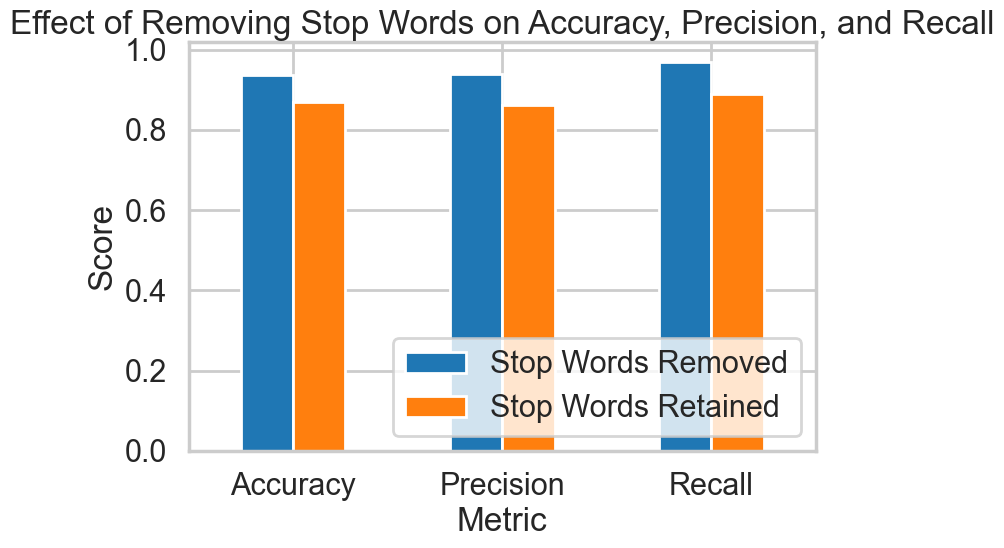

In [78]:
from matplotlib import pyplot as plt

stop_words_removed = {
   "accuracy": accuracy,
    "precision": precision,
    "recall": recall,
}
stop_words_retained = {
   "accuracy": 0.869192,
    "precision": 0.861349,
    "recall": 0.888704,
}

data = {
    "Metric": ["Accuracy", "Precision", "Recall"],
    "Stop Words Removed": [stop_words_removed["accuracy"], stop_words_removed["precision"], stop_words_removed["recall"]],
    "Stop Words Retained": [stop_words_retained["accuracy"], stop_words_retained["precision"], stop_words_retained["recall"]]
}

df = pd.DataFrame(data)

# Plotting the results
plt.figure(figsize=(8, 6))
df.plot(x="Metric", kind="bar", ax=plt.gca(), color=["#1f77b4", "#ff7f0e"])
plt.title("Effect of Removing Stop Words on Accuracy, Precision, and Recall")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.legend(loc="lower right")

# Show the plot
plt.tight_layout()
plt.show()


Experiment on the number of words used for training.  Filter the dictionary to 
include only words occurring more than k times (1000 words, then k > 100, and k 
= 50 times).  For example, the word “offer” appears 150 times, that means that it 
will be included in the dictionary. 

In [ ]:
common_words_df = sorted_count[['Word', 'Count']][:10000].reset_index(drop=True)

common_words = common_words_df[common_words_df.Count > 1000]
common_words

In [7]:
# Initialize lists to hold email feature values for spam and ham categories
g2_spam_values = []
g2_ham_values = []

# Initialize counters for total spam and ham emails
g2_total_spam = 0
g2_total_ham = 0

# Counter to track the number of processed folders
g2_folder_count = 0

# Iterate through all training folders containing email files
for folder in training_folders:
    email_files = os.listdir(folder)  # List all email files in the current folder
    
    # Iterate through each email file in the folder
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])  # Construct the full path to the email file
        
        # Open the email file for reading, handling encoding errors
        with open(file_path, 'r', encoding='utf-8', errors='ignore') as f:
            # Retrieve the body content of the email
            body = get_email_body(f)
        
        # Determine if the email is classified as spam or ham based on labels
        if "spam" in labels[i + (g2_folder_count * 300)]:
            spam_or_ham = "spam"  # Email is spam
            g2_total_spam += 1  # Increment spam counter
        else:
            spam_or_ham = "ham"  # Email is ham
            g2_total_ham += 1  # Increment ham counter
        
        # Initialize a list to store the presence (1) or absence (0) of common words in the email
        email_values = []
        
        # Loop through the list of top 10,000 common words
        for word in common_words['Word']:
            # Check if the word is present in the email body
            if word in body:
                value = 1  # Word is present
            else:
                value = 0  # Word is absent
            
            # Append the presence/absence value to the email_values list
            email_values.append(value)
        
        # Append the email values to the respective category list (spam or ham)
        if spam_or_ham == "spam":
            g2_spam_values.append(email_values)  # Store values for spam emails
        else:
            g2_ham_values.append(email_values)  # Store values for ham emails
            
    # Increment the folder count after processing each folder
    g2_folder_count += 1


NameError: name 'training_folders' is not defined

In [6]:
# Create DataFrames for spam and ham feature matrices
g2_spam_feature_matrix = pd.DataFrame(g2_spam_values, columns=common_words['Word'])
g2_ham_feature_matrix = pd.DataFrame(g2_ham_values, columns=common_words['Word'])

# Summing up the occurrence of each word in spam and ham emails
g2_spam_vector = g2_spam_feature_matrix.sum()
g2_ham_vector = g2_ham_feature_matrix.sum()

# Initialize DataFrames to store probabilities
g2_prob_spam_words = pd.DataFrame(columns=['Word', 'Probability'])
g2_prob_ham_words = pd.DataFrame(columns=['Word', 'Probability'])

# Assigning words to the DataFrames
g2_prob_spam_words['Word'] = g2_spam_feature_matrix.columns
g2_prob_ham_words['Word'] = g2_ham_feature_matrix.columns

# Calculate total words in spam and ham categories
g2_spam_word_total = g2_spam_feature_matrix.values.sum()
g2_ham_word_total = g2_ham_feature_matrix.values.sum()

# Calculate probabilities for spam words
probabilities = []
for i in range(len(g2_spam_vector)):
    probability = (g2_spam_vector.iloc[i] + 1) / (g2_spam_word_total + len(g2_spam_vector))  
    probabilities.append(probability)
g2_prob_spam_words['Probability'] = probabilities

# Calculate probabilities for ham words
probabilities = []
for i in range(len(g2_ham_vector)):
    probability = (g2_ham_vector.iloc[i] + 1) / (g2_ham_word_total + len(g2_ham_vector))  
    probabilities.append(probability)
g2_prob_ham_words['Probability'] = probabilities

# Create copies of probability DataFrames and set the index to 'Word'
g2_prob_spam_words_copy = g2_prob_spam_words.copy().set_index('Word').to_dict('index')
g2_prob_ham_words_copy = g2_prob_ham_words.copy().set_index('Word').to_dict('index')


NameError: name 'pd' is not defined

In [3]:
# Function to classify an email as either spam or ham based on its content
def classify_email1(file):
    # Extract the body of the email from the MIME file
    body = get_email_body(file)
    
    # Clean the email content by removing unwanted characters and formatting
    word_list = clean_data(body)
    
    # Remove common stop words from the list of words
    word_list = remove_stop_words(word_list)
    
    # Convert all words to lowercase for uniformity
    word_list = [x.lower() for x in word_list]
    
    final_words = []  # Initialize a list to hold valid words found in the dictionary
    
    # Filter the words to include only those present in the common words dictionary
    for word in word_list:
        if word in list(common_words['Word']):  # Check if the word is in the predefined common words list
            final_words.append(word)  # Add valid words to the final_words list
    
    # Initialize variables to store cumulative probabilities for spam and ham classifications
    classify_spam = 0
    classify_ham = 0
    
    # Iterate through the filtered list of words to calculate probabilities
    for word in final_words:
        # Retrieve the conditional probabilities of the word given it is spam or ham
        word_prob_spam = g2_prob_spam_words_copy[word]['Probability']
        word_prob_ham = g2_prob_ham_words_copy[word]['Probability']
        
        # Update the cumulative spam probability using the log of the probabilities
        classify_spam += (np.log(prob_spam) + np.log(word_prob_spam))
        
        # Update the cumulative ham probability using the log of the probabilities
        classify_ham += (np.log(prob_ham) + np.log(word_prob_ham))
    
    # Compare cumulative probabilities to determine the classification
    if classify_spam > classify_ham:
        return "Spam"  # Return 'Spam' if the spam probability is higher
    elif classify_spam < classify_ham:
        return "Ham"  # Return 'Ham' if the ham probability is higher
    else:
        # In cases of ambiguity, assume the email is spam
        return "Spam"  # Default classification for uncertain cases


In [ ]:
g2_test_classification = []

for folder in testing_folders[:10]:
    email_files = os.listdir(folder)
    
    for i in range(len(email_files)):
        file_path = os.path.join(folder, email_files[i])
        
        # Open the file as a file object
        with open(file_path, 'r', encoding='utf-8', errors='replace') as f:
            # Pass the file object to the classification function
            g2_test_classification.append(classify_email1(f))


Performance Evaluation

In [ ]:
g2_test_labels_real = labels[total_emails:total_emails+3000]
g2_true_positive = 0
g2_true_negative = 0
g2_false_positive = 0
g2_false_negative = 0

In [86]:
print(g2_true_positive)
print(g2_true_negative) 
print(g2_false_positive)
print(g2_false_negative)

1959
108
907
26


In [ ]:
for i in range(len(g2_test_classification)):
    print(test_labels_real)
    if "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_true_positive = g2_true_positive + 1
    elif "spam" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_false_negative = g2_false_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Ham":
        g2_true_negative = g2_true_negative + 1
    elif "ham" in g2_test_labels_real[i] and g2_test_classification[i] == "Spam":
        g2_false_positive = g2_false_positive + 1

In [87]:
g2_accuracy = (g2_true_negative + g2_true_positive) / (g2_true_negative + g2_true_positive + g2_false_positive + g2_false_negative)
g2_precision = g2_true_positive / (g2_true_positive + g2_false_positive)
g2_recall = g2_true_positive / (g2_true_positive + g2_false_negative)

In [88]:
print(g2_accuracy, g2_precision, g2_recall)

0.689 0.6835310537334264 0.9869017632241813


In [89]:
x_axis = ['Accuracy', 'Precision', 'Recall']
y_axis = [g2_accuracy, g2_precision, g2_recall]

In [ ]:
plt.bar(x_axis, y_axis)
plt.title('Measures When Dictionary only contains Words w/ k > 1000')
plt.xlabel('Measures')
plt.ylabel('values')
plt.show()

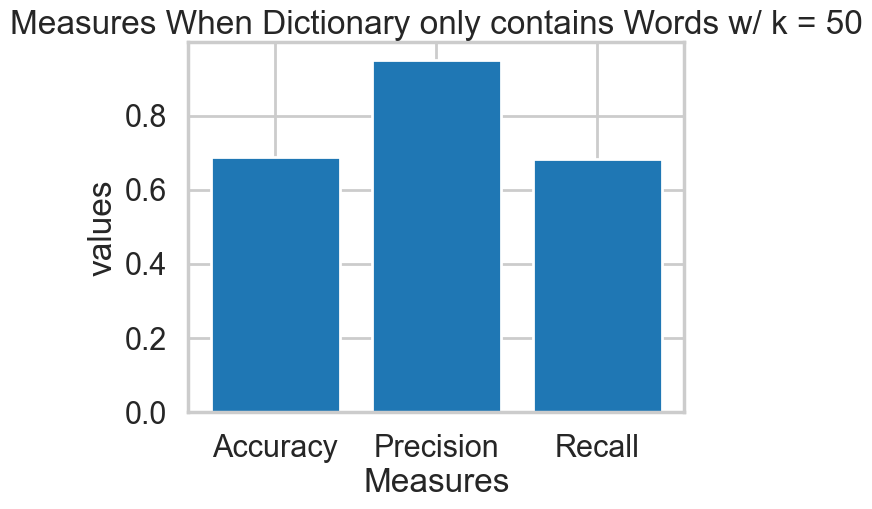 

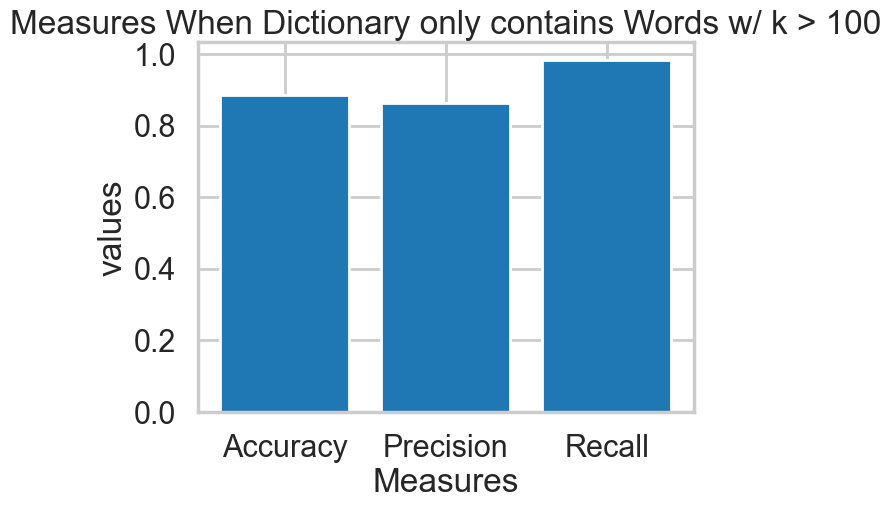

Discuss the results of the different parameters used for Lambda smoothing. Test it on 5 varying values of the λ (e.g. λ = 2.0, 1.0, 0.5, 0.1, 0.005), Evaluate performance metrics for each.

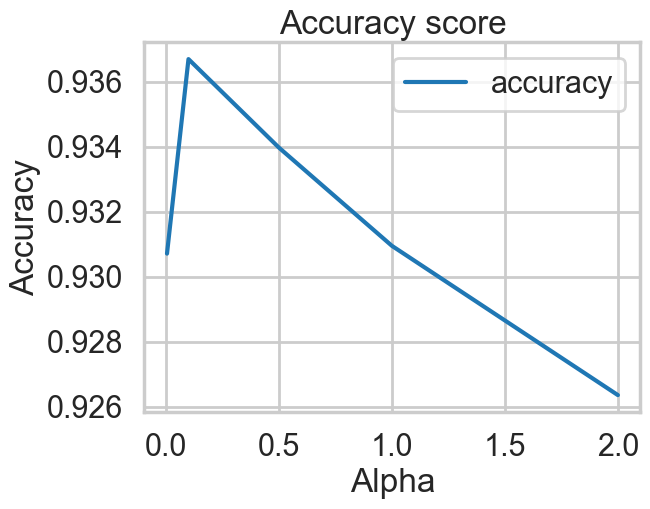

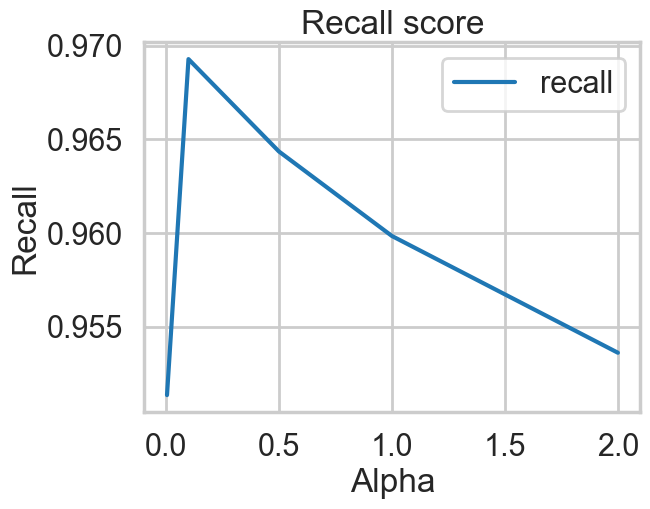

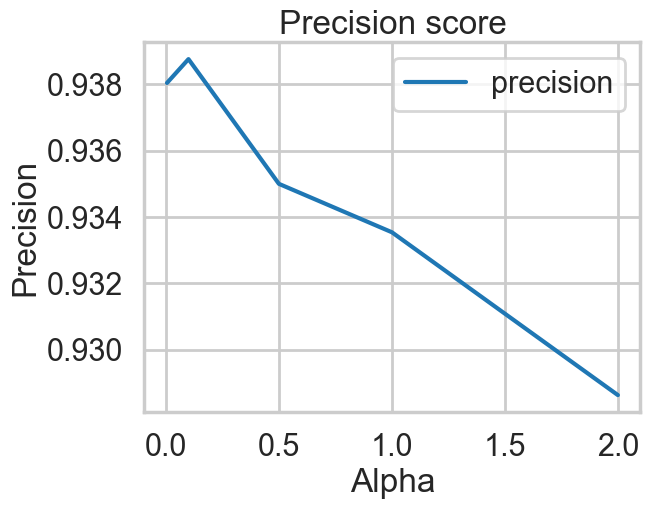

In [91]:
import matplotlib.pyplot as plt
import pandas as pd

data = {

    'alpha': [2.0, 1.0, 0.5, 0.1, 0.005],
    'accuracy': [0.9263600, 0.9309500, 0.9339700, 0.9366900, 0.930709871],  
    'precision': [0.9286300, 0.9335400, 0.9350000, 0.9387600, 0.9380420],  
    'recall': [0.9536200, 0.9598500, 0.9643600, 0.9692850, 0.9513600]  
}

df_l = pd.DataFrame(data)

def plot(y):
    df_l.plot(kind='line', x='alpha', y=y)
    plt.title(y.capitalize() + " score")
    plt.xlabel('Alpha')
    plt.ylabel(y.capitalize())
    plt.grid(True)
    plt.show()

# Plot accuracy, recall, and precision
plot('accuracy')
plot('recall')
plot('precision')


* According to the graphs for the metrics, all scores demonstrated an upward trend, except when lambda = 0.1. The accuracy, recall and precision for lambda = 0.1 are greater than those for lambda = 0.005. Furthermore, lambda = 0.1 achieved the highest metric scores compared to the other values.

What are your recommendations to further improve the model?

* Add More Diverse Training Data which can expand the training dataset with more varied examples which can significantly improve the model's ability to generalize to new inputs.

* Optimize Hyperparameters in adjusting algorithm parameters such as Laplace smoothing (alpha), can enhance model performance. Techniques like grid search or random search can be employed to identify the optimal values for these parameters.

* Evaluate Using Various Metrics: It's crucial to assess model performance using a range of metrics beyond just precision, recall, and accuracy, as effectiveness can vary depending on the specific use case.